<a href="https://colab.research.google.com/github/evgeny-kolonsky/Lab4/blob/main/NU/Lab4_Alpha_range.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab4 Nuclear Experiment. Alpha range

Evgeny Kolonsky

v.0.1.1

In [4]:
import numpy as np
import matplotlib.pyplot as plt

Set #1

Po-210 dated 10.2024

Constants and parameters

In [15]:
di = 10 # distance between shelves, mm
d0 = 12.3 # distance between top shelf and GM counter window, mm
r = 31.6 / 2 # GM window radius, mm
mica_thickness = 0.2 # GM window thickness, mm (? - found in web, could be other)
shelf_thickness = 1.0 # sample shelf thickness, mm
sample_thikness = 1.0 # Po-210 sample is slighly over the shelf, mm
rho_mica = 2 # mg/cm3, GM window density,
rho_air = 1.2 # mg/cm3, air density at room temperature
I_background = 0.29 # counts /s
E_alpha = 5.3 #MeV, decay energy reference for Po-210
# Expected range, mm
R = 0.32 * E_alpha**1.5

Solid angle
$$
\Omega = 2 \pi \left( 1 - \frac{1}{\sqrt{1+(r/h)^2}}\right)
\tag{13}
$$

Range
$$
R = 0.32 \, {E_\alpha} ^{3/2}
\tag{5}
$$
where $E_{\alpha}$ measured in `MeV`, range $R$ in `cm`.

Measurements

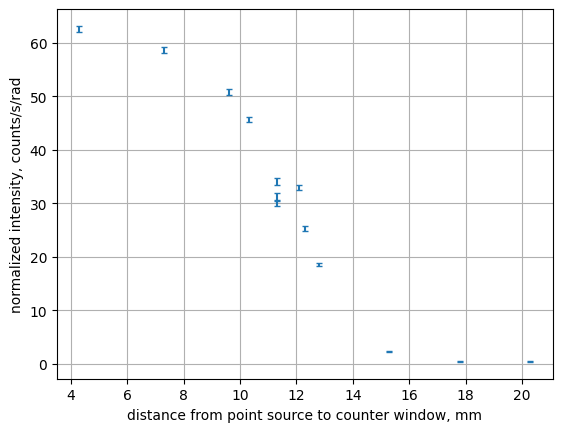

In [12]:
data = '''
# shelf#, spacers/mm, counts, time/s
1 0 7819 60
2 0 80 143
2 2.5 80 110
2 5.0 289 64
2 7.5 3625 84
2 8.0 3681 60
2 8.2 4953 61
2 9.0 1718 21
2 9.0 3559 45
2 9.0 3138 35
1 0.7 9366 61
1 3.0 9202 43
1 6.0 10721 37
'''
n, spacer, counts, time = np.loadtxt(data.splitlines(), unpack=True)
# distance
h = d0 + (n - 1) * di - shelf_thickness - sample_thikness - spacer
#h += rho_mica / rho_air * mica_thickness # take into account effective distance to overcome mica window
# solid angle
omega = 2 * np.pi * (1 - 1 / np.sqrt(1 + (r / h)**2))
# intensity
delta = 1/np.sqrt(counts) # relative error
I = counts / time
I_norm = I / omega
I_err = delta * I_norm


plt.errorbar(h, I_norm, yerr=I_err, linestyle='', capsize=2)
plt.xlabel('distance from point source to counter window, mm')
plt.ylabel('normalized intensity, counts/s/rad')
plt.grid()

# GM Specification data

Effective range is limited by GM mica window.

According to counter [documentation](https://www.lip.pt/~patricia/FisicaDaRadiacao/Geiger-Mueller-Detectors-Canberra-sheet.pdf) (fig. below) we expect to have range 15 mm for energy over 2.6 MeV.


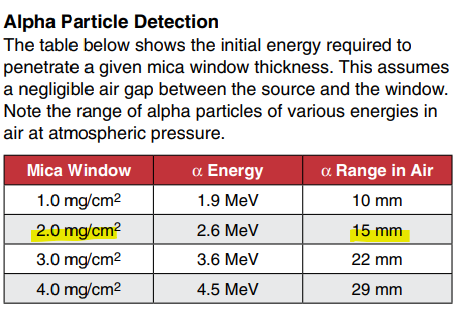

# From linear distance to areal density

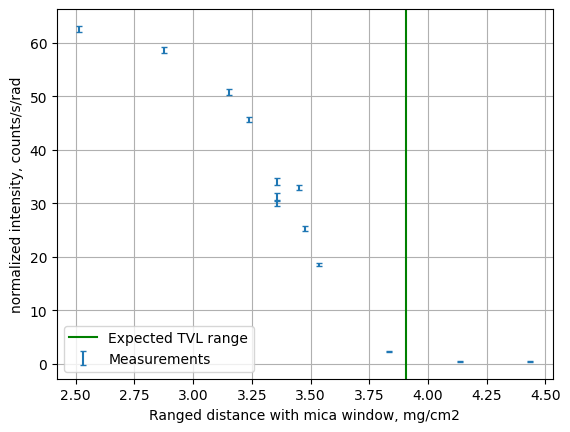

In [21]:
w = h/10 * rho_air + rho_mica # areal denisty in mg/cm2
plt.errorbar(w, I_norm, yerr=I_err, linestyle='', capsize=2, label='Measurements')
plt.axvline(R,  color='green', label='Expected TVL range')
plt.xlabel('Ranged distance with mica window, mg/cm2')
plt.ylabel('normalized intensity, counts/s/rad')
plt.legend()
plt.grid()

**Conclusion**

Measurements fit rather good to range expected.